HEAT WAVES PROJECT DRAFT

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt


In [3]:

column_names = ['year', 'month', 'day', 'Tmax']

data= pd.read_csv('Yendi_1960_2020.txt', sep='\s+', header=None, names=column_names)
data

,year,month,day,Tmax
0,1960,1,1,32.8
1,1960,1,2,32.2
2,1960,1,3,33.3
3,1960,1,4,33.9
4,1960,1,5,35.6
...,...,...,...,...
22276,2020,12,27,36.5
22277,2020,12,28,35.5
22278,2020,12,29,36.0
22279,2020,12,30,36.6


In [6]:
data['date']= pd.to_datetime(data[['year','month','day']])
data.set_index('date', inplace= True)
data.drop(['year','month','day'], axis=1, inplace= True)

# data

In [4]:
data

,year,month,day,Tmax
0,1960,1,1,32.8
1,1960,1,2,32.2
2,1960,1,3,33.3
3,1960,1,4,33.9
4,1960,1,5,35.6
...,...,...,...,...
22276,2020,12,27,36.5
22277,2020,12,28,35.5
22278,2020,12,29,36.0
22279,2020,12,30,36.6


In [6]:
temp_1961_1990= data['Tmax'].iloc[366:11323]
temp_1961_1990

366      32.8
367      35.0
368      33.3
369      35.0
370      35.0
         ... 
11318    34.6
11319    33.9
11320    34.2
11321    35.6
11322    32.3
Name: Tmax, Length: 10957, dtype: float64

In [7]:
temp=data.Tmax
temp

0        32.8
1        32.2
2        33.3
3        33.9
4        35.6
         ... 
22276    36.5
22277    35.5
22278    36.0
22279    36.6
22280    37.5
Name: Tmax, Length: 22281, dtype: float64

FIRST WINDOW

In [8]:
percentile_85 = np.percentile( temp_1961_1990, 85)
percentile_85

36.7

In [9]:
percentile_90 = np.percentile( temp_1961_1990, 90)
percentile_90

37.8

In [10]:
percentile_95 = np.percentile( temp_1961_1990, 95)
percentile_95

38.3

SECOND WINDOW

In [11]:
temp_1991_2020= temp.iloc[11323:22281]
temp_1991_2020

11323    31.1
11324    31.6
11325    31.5
11326    34.8
11327    35.2
         ... 
22276    36.5
22277    35.5
22278    36.0
22279    36.6
22280    37.5
Name: Tmax, Length: 10958, dtype: float64

In [12]:
percentile_85_2 = np.percentile( temp_1991_2020, 85)
percentile_85_2

37.8

In [13]:
percentile_90_2 = np.percentile( temp_1991_2020, 90)
percentile_90_2

38.5

In [14]:
percentile_95_2 = np.percentile( temp_1991_2020, 95)
percentile_95_2

39.4

AVERAGE Tmax

In [14]:
avg_temp_1961_1990=temp_1961_1990.mean()
avg_temp_1961_1990

33.378086154969424

COUNTING EPISODES

In [99]:
temp_more_than_percentile_85= temp_1961_1990.where(temp_1961_1990 > percentile_85)
temp_more_than_percentile_85.count()

1642

In [100]:
consecutive_days = temp_1961_1990.groupby(temp_1961_1990.ne(temp_1961_1990.shift()).cumsum()).transform('count')
# consecutive_days

In [101]:
temp_more_than_percentile_85 = temp_more_than_percentile_85.dropna()
temp_more_than_percentile_85.count()


1642

In [109]:
temp_more_than_percentile_85 = temp_more_than_percentile_85[(temp_more_than_percentile_85 > percentile_85) & (consecutive_days >= 3)]

temp_more_than_percentile_85


date
1961-02-24    38.9
1961-02-25    38.9
1961-02-26    38.9
1961-03-22    39.4
1961-03-23    39.4
              ... 
1984-01-14    37.2
1984-01-15    37.2
1988-03-06    37.8
1988-03-07    37.8
1988-03-08    37.8
Name: Tmax, Length: 143, dtype: float64

<BarContainer object of 30 artists>

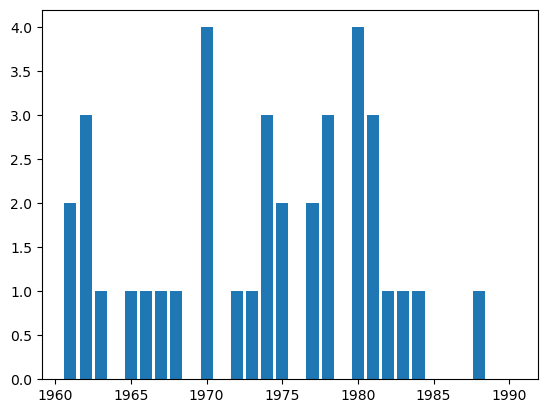

In [70]:
years_list = [1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990]

episodes_of_heat_waves= [2,3,1,0,1,1,1,1,0,4,0,1,1,3,2,0,2,3,0,4,3,1,1,1,0,0,0,1,0,0]

plt.bar(years_list, episodes_of_heat_waves)

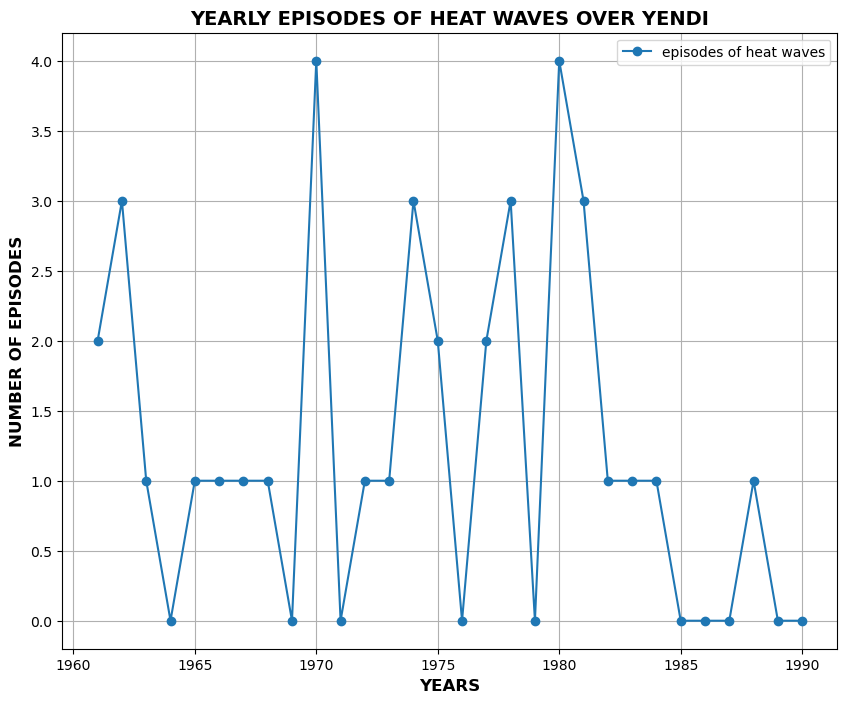

In [80]:
fig, ax = plt.subplots(figsize=(10, 8))


ax.plot(years_list,episodes_of_heat_waves, label='episodes of heat waves',  marker='o', linewidth=1.5)
ax.set_xlabel('YEARS', fontsize=12,fontweight='bold')
ax.set_ylabel('NUMBER OF EPISODES', fontsize=12, fontweight='bold')
ax.legend()
ax.set_title('YEARLY EPISODES OF HEAT WAVES OVER YENDI', fontsize=14, fontweight='bold')
plt.grid(True)

SyntaxError: invalid syntax (83887642.py, line 3)

In [138]:
temp_more_than_percentile_85
# Assuming 'df' is your DataFrame with year, month, day as the index and 'Tmax' column
# Reset the index to convert the index into columns
temp_more_than_percentile_85_reset = temp_more_than_percentile_85.reset_index()

# Rename the columns accordingly
temp_more_than_percentile_85_reset = temp_more_than_percentile_85_reset.rename(columns={'year': 'Year', 'month': 'Month', 'day': 'Day', 'Tmax': 'Tmax'})

temp_more_than_percentile_85_reset.tail(20)



,date,Tmax
123,1981-02-19,38.9
124,1981-02-20,38.9
125,1981-02-21,38.9
126,1981-02-22,38.9
127,1981-02-23,38.9
128,1981-03-03,39.4
129,1981-03-04,39.4
130,1981-03-05,39.4
131,1982-01-17,37.2
132,1982-01-18,37.2


In [139]:
date_1961=['Feb-24','Feb-25','Feb-26','Mar-22','Mar-23','Mar-24']     
Tmax_1961=[38.9,38.9,38.9,39.4,39.4,39.4]    

date_1962=['Feb-14','Feb-15','Feb-16','Feb-17','Feb-26','Feb-27','Feb-28','Apr-10','Apr-11','Apr-12']     
Tmax_1962=[38.9,38.9,38.9,38.9,38.9,38.9,38.9,37.2,37.2,37.2]      

date_1963=['Feb-09','Feb-10','Feb-11','Feb-12','Feb-13']     
Tmax_1963=[37.2,37.2,37.2,37.2,37.2]      

date_1965=['Feb-26','Feb-27','Feb-28']     
Tmax_1965=[38.9,38.9,38.9]

date_1966=['Jan-17','Jan-18','Jan-19']     
Tmax_1966=[37.2,37.2,37.2]      

date_1967=['Jan-10','Jan-11','Jan-12','Jan-13']     
Tmax_1967=[37.8,37.8,37.8,37.8]      

date_1968=['Feb-15','Feb-16','Feb-17','Feb-18']     
Tmax_1968=[37.8,37.8,37.8,37.8]      

date_1970=['Jan-01','Jan-02','Jan-03','Feb-23','Feb-24','Feb-25','Feb-26','Feb-27','Feb-28','Mar-24','Mar-25','Mar-26','Mar-27','Mar-31','Apr-01','Apr-02','Apr-13','Apr-14','Apr-15']     
Tmax_1970=[37.2,37.2,37.2,37.2,37.2,37.2,37.2,37.2,37.2,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9]      

date_1972=['Feb-12','Feb-13','Feb-14','Feb-15']     
Tmax_1972=[37.2,37.2,37.2,37.2]      

date_1973=['Feb-08','Feb-09','Feb-10']     
Tmax_1973=[38.3,38.3,38.3]      

date_1974=['Feb-21','Feb-22','Feb-23','Feb-24','Mar-01','Mar-02','Mar-03','Mar-04','Mar-23','Mar-24','Mar-25']     
Tmax_1974=[37.8,37.8,37.8,37.8,38.3,38.3,38.3,38.3,38.3,38.3,38.3]      

date_1975=['Feb-14','Feb-15','Feb-16','Feb-17','Mar-08','Mar-09','Mar-10']     
Tmax_1975=[37.2,37.2,37.2,37.2,37.8,37.8,37.8]      

date_1977=['Feb-18','Feb-19','Feb-20','Mar-10','Mar-11','Mar-12','Mar-13','Mar-16','Mar-17','Mar-18']     
Tmax_1977=[37.8,37.8,37.8,38.9,38.9,38.9,38.9,37.8,37.8,37.8]

date_1978=['Jan-23','Jan-24','Jan-25','Feb-01','Feb-02','Feb-03','Feb-15','Feb-16','Feb-17']     
Tmax_1978=[37.2,37.2,37.2,38.3,38.3,38.3,38.3,38.3,38.3]

date_1980=['Jan-20','Jan-21','Jan-22','Feb-09','Feb-10','Feb-11','Feb-12','Feb-13','Feb-14','Feb-19','Feb-20','Feb-21','Feb-25','Feb-26','Feb-27','Mar-01','Mar-02','Mar-03','Mar-04','Apr-15','Apr-16','Apr-17']     
Tmax_1980=[37.2,37.2,37.2,37.8,37.8,37.8,37.8,37.8,37.8,37.8,37.8,37.8,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.3,38.3,38.3]

date_1981=['Feb-03','Feb-04','Feb-05','Feb-19','Feb-20','Feb-21','Feb-22','Feb-23','Mar-03','Mar-04','Mar-05']     
Tmax_1981=[37.2,37.2,37.2,38.9,38.9,38.9,38.9,38.9,39.4,39.4,39.4]

date_1982=['Jan-17','Jan-18','Jan-19']    
Tmax_1982=[37.2,37.2,37.2]


date_1983=['Feb-11','Feb-12','Feb-13']    
Tmax_1983=[38.0,38.0,38.0]


date_1984=['Jan-33','Jan-14','Jan-15']     
Tmax_1984=[37.2,37.2,37.2]

date_1988=['Mar-06','Mar-07','Mar-08']     
Tmax_1988=[37.8,37.8,37.8]





Text(0.5, 0.98, ' EPISODES OF HEAT WAVES FOR YENDI FROM 1961 TO 1973')

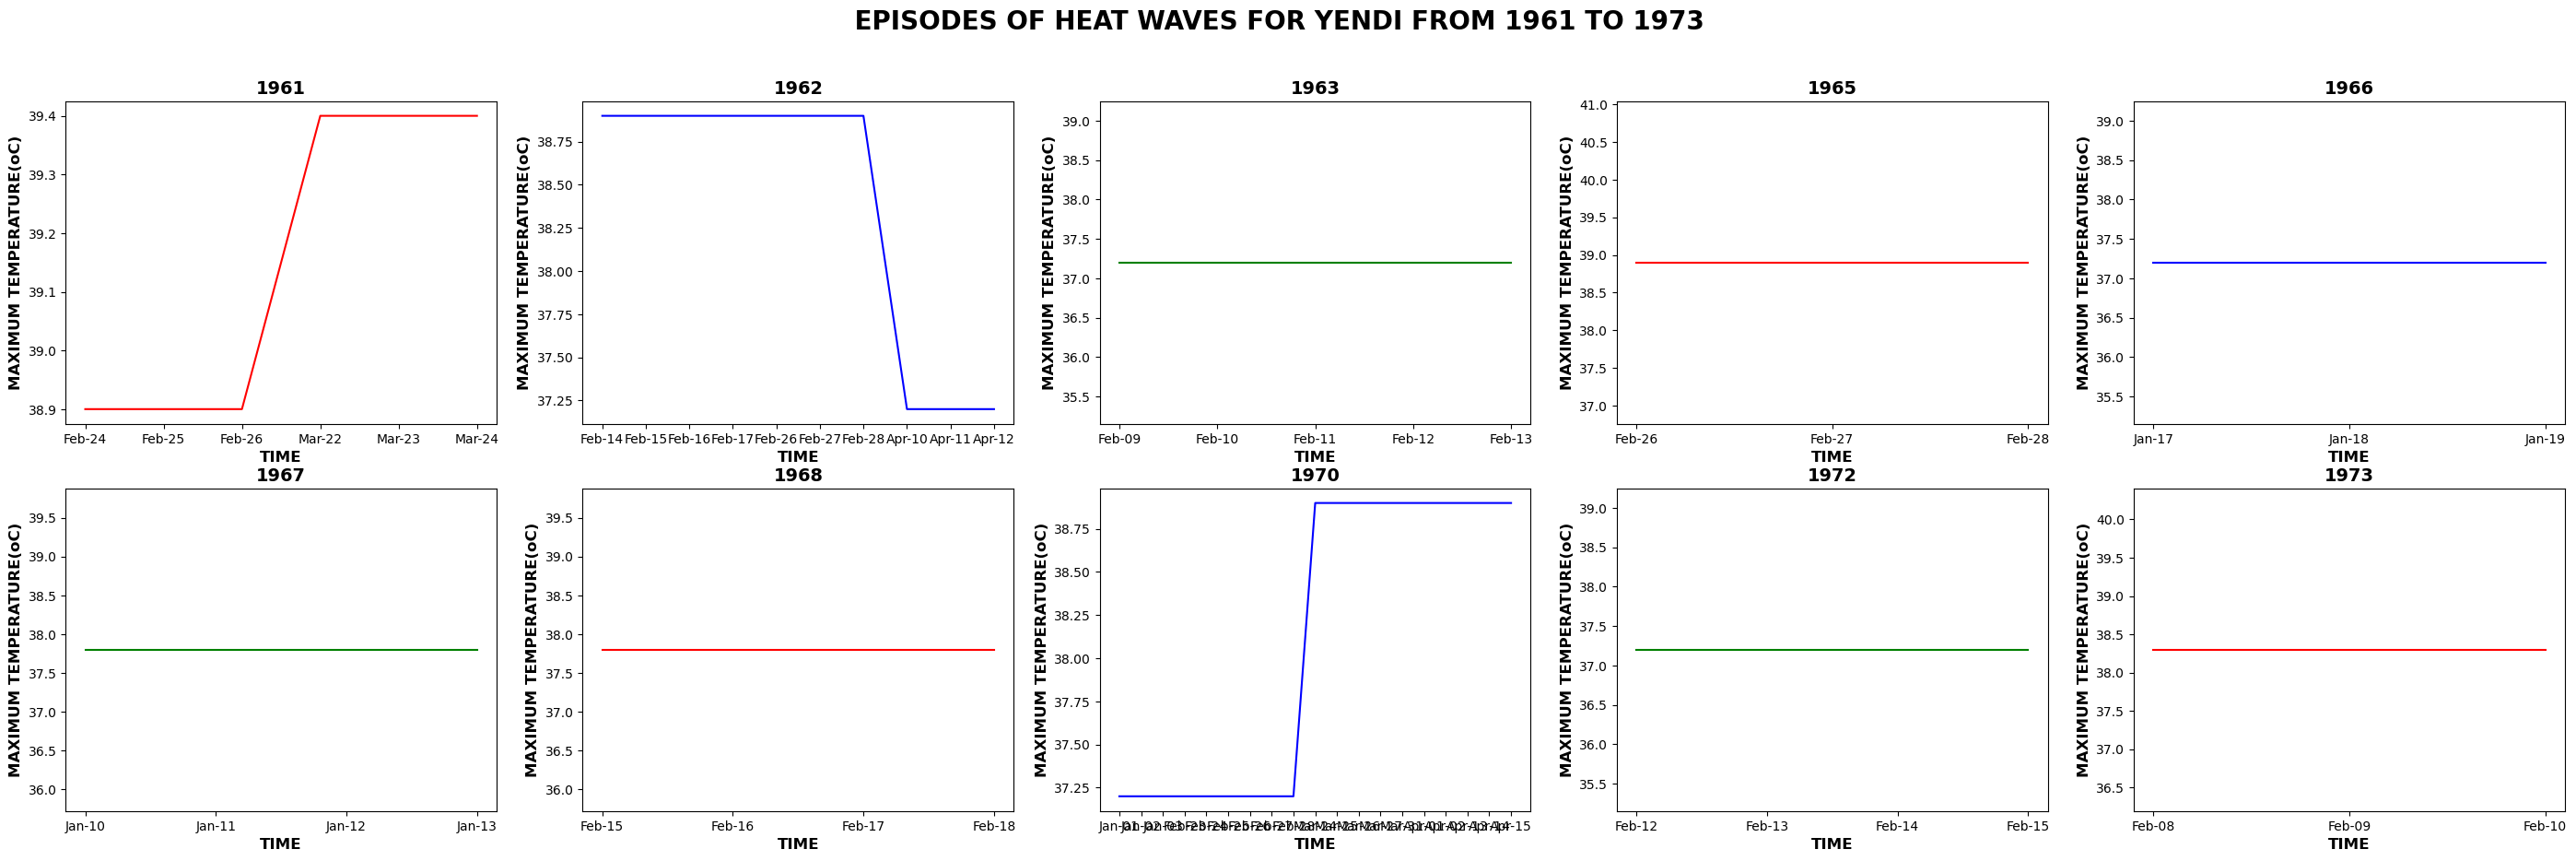

In [165]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(35, 10))
ax = ax.flatten()

ax[0].plot(date_1961,Tmax_1961, color='r')
ax[0].set_xlabel('TIME', fontsize=12,fontweight='bold')
ax[0].set_ylabel('MAXIMUM TEMPERATURE(oC)', fontsize=12, fontweight='bold')
# ax[0].legend()
ax[0].set_title('1961', fontsize=14, fontweight='bold')

ax[1].plot(date_1962,Tmax_1962, color='b')
ax[1].set_xlabel('TIME', fontsize=12, fontweight='bold')
ax[1].set_ylabel('MAXIMUM TEMPERATURE(oC)', fontsize=12,fontweight='bold')
# ax[1].legend()
ax[1].set_title('1962', fontsize=14, fontweight='bold')

ax[2].plot(date_1963,Tmax_1963, color='g')
ax[2].set_xlabel('TIME', fontsize=12,fontweight='bold')
ax[2].set_ylabel('MAXIMUM TEMPERATURE(oC)', fontsize=12, fontweight='bold')
# ax[2].legend()
ax[2].set_title('1963', fontsize=14, fontweight='bold')

ax[3].plot(date_1965,Tmax_1965, color='r')
ax[3].set_xlabel('TIME', fontsize=12,fontweight='bold')
ax[3].set_ylabel('MAXIMUM TEMPERATURE(oC)', fontsize=12, fontweight='bold')
# ax[3].legend()
ax[3].set_title('1965', fontsize=14, fontweight='bold')

ax[4].plot(date_1966,Tmax_1966, color='b')
ax[4].set_xlabel('TIME', fontsize=12,fontweight='bold')
ax[4].set_ylabel('MAXIMUM TEMPERATURE(oC)', fontsize=12, fontweight='bold')
# ax[4].legend()
ax[4].set_title('1966', fontsize=14, fontweight='bold')

ax[5].plot(date_1967,Tmax_1967, color='g')
ax[5].set_xlabel('TIME', fontsize=12,fontweight='bold')
ax[5].set_ylabel('MAXIMUM TEMPERATURE(oC)', fontsize=12, fontweight='bold')
# ax[5].legend()
ax[5].set_title('1967', fontsize=14, fontweight='bold')

ax[6].plot(date_1968,Tmax_1968, color='r')
ax[6].set_xlabel('TIME', fontsize=12,fontweight='bold')
ax[6].set_ylabel('MAXIMUM TEMPERATURE(oC)', fontsize=12, fontweight='bold')
# ax[6].legend()
ax[6].set_title('1968', fontsize=14, fontweight='bold')

ax[7].plot(date_1970,Tmax_1970, color='b')
ax[7].set_xlabel('TIME', fontsize=12,fontweight='bold')
ax[7].set_ylabel('MAXIMUM TEMPERATURE(oC)', fontsize=12, fontweight='bold')
# ax[7].legend()
ax[7].set_title('1970', fontsize=14, fontweight='bold')

ax[8].plot(date_1972,Tmax_1972, color='g')
ax[8].set_xlabel('TIME', fontsize=12,fontweight='bold')
ax[8].set_ylabel('MAXIMUM TEMPERATURE(oC)', fontsize=12, fontweight='bold')
# ax[8].legend()
ax[8].set_title('1972', fontsize=14, fontweight='bold')

ax[9].plot(date_1973,Tmax_1973, color='r')
ax[9].set_xlabel('TIME', fontsize=12,fontweight='bold')
ax[9].set_ylabel('MAXIMUM TEMPERATURE(oC)', fontsize=12, fontweight='bold')
# ax[9].legend()
ax[9].set_title('1973', fontsize=14, fontweight='bold')

fig.suptitle(' EPISODES OF HEAT WAVES FOR YENDI FROM 1961 TO 1973', fontweight='bold', fontsize=20)

Text(0.5, 1.0, '1988')

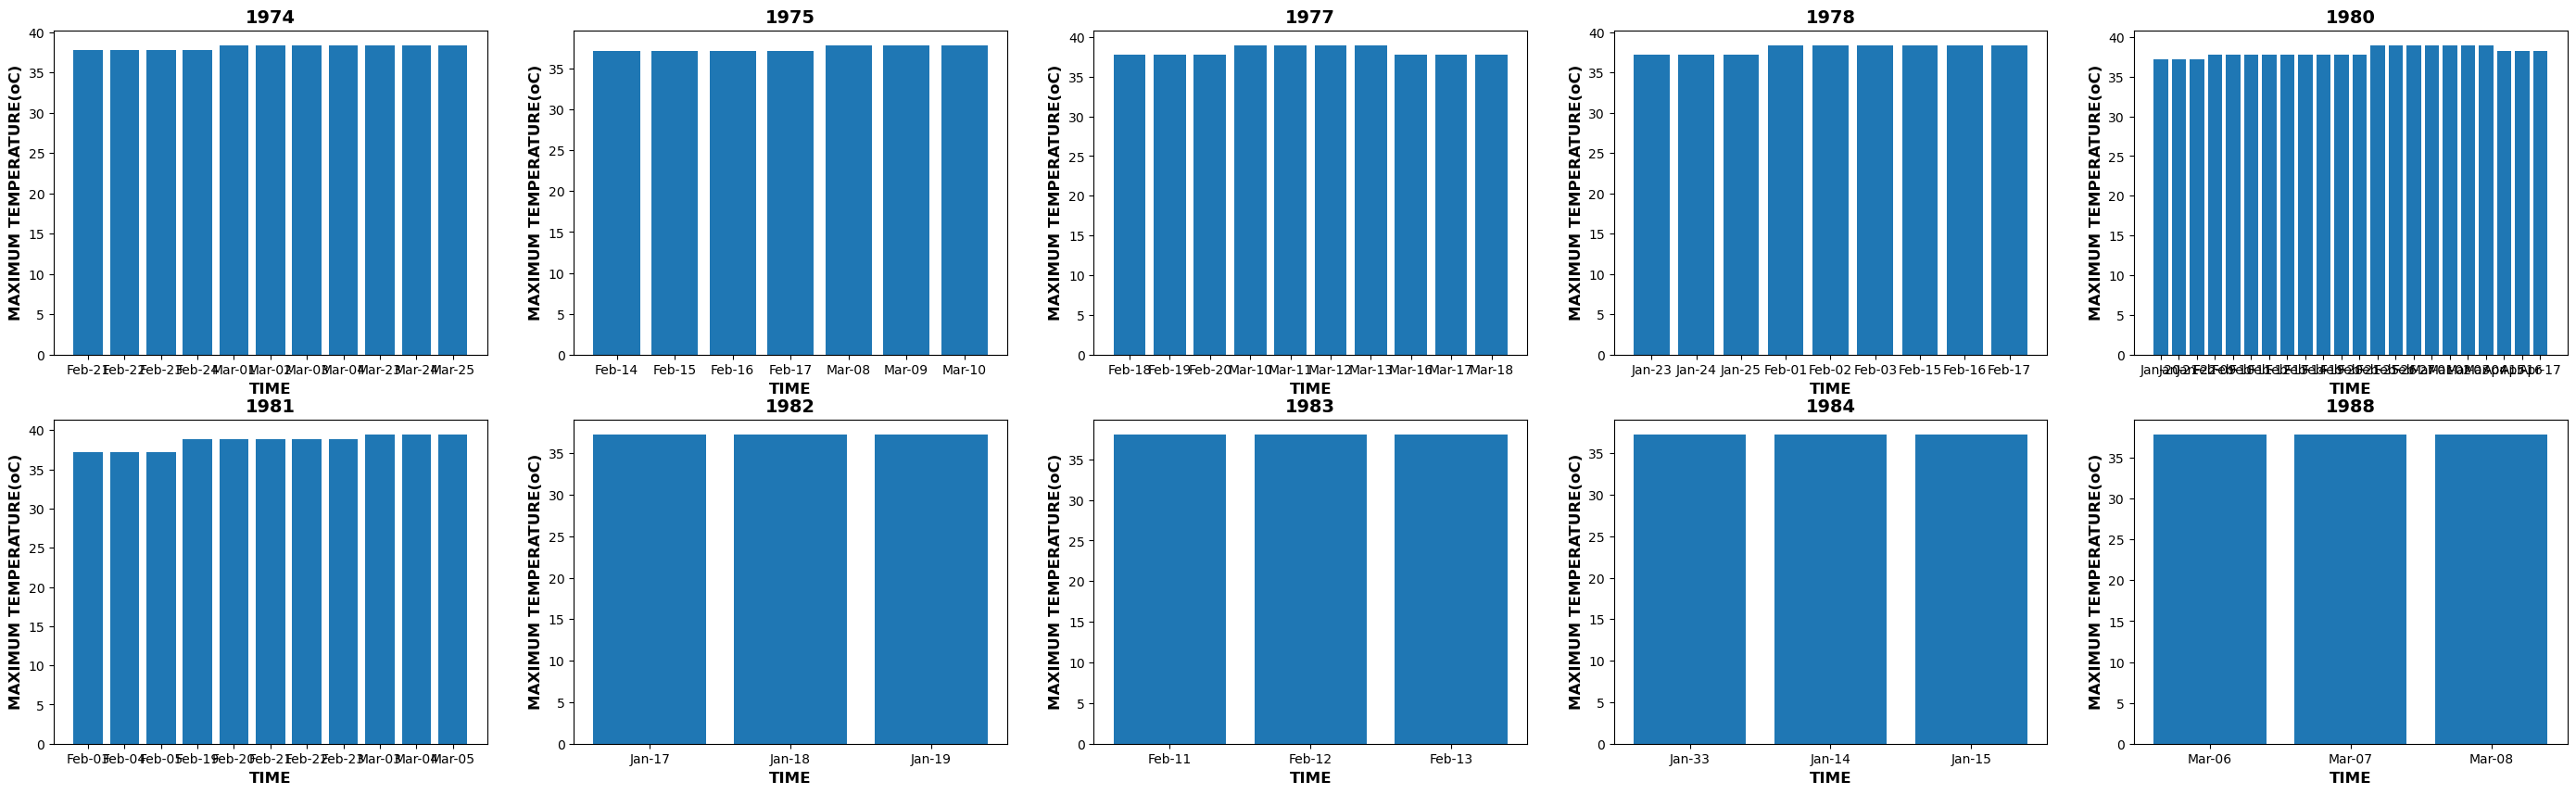

In [158]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(35, 10))
ax = ax.flatten()


ax[0].bar(date_1974,Tmax_1974)
ax[0].set_xlabel('TIME', fontsize=12,fontweight='bold')
ax[0].set_ylabel('MAXIMUM TEMPERATURE(oC)', fontsize=12, fontweight='bold')
# ax[10].legend()
ax[0].set_title('1974', fontsize=14, fontweight='bold')

ax[1].bar(date_1975,Tmax_1975)
ax[1].set_xlabel('TIME', fontsize=12,fontweight='bold')
ax[1].set_ylabel('MAXIMUM TEMPERATURE(oC)', fontsize=12, fontweight='bold')
# ax[12].legend()
ax[1].set_title('1975', fontsize=14, fontweight='bold')

ax[2].bar(date_1977,Tmax_1977)
ax[2].set_xlabel('TIME', fontsize=12,fontweight='bold')
ax[2].set_ylabel('MAXIMUM TEMPERATURE(oC)', fontsize=12, fontweight='bold')
# ax[13].legend()
ax[2].set_title('1977', fontsize=14, fontweight='bold')

ax[3].bar(date_1978,Tmax_1978)
ax[3].set_xlabel('TIME', fontsize=12,fontweight='bold')
ax[3].set_ylabel('MAXIMUM TEMPERATURE(oC)', fontsize=12, fontweight='bold')
# ax[15].legend()
ax[3].set_title('1978', fontsize=14, fontweight='bold')

ax[4].bar(date_1980,Tmax_1980)
ax[4].set_xlabel('TIME', fontsize=12,fontweight='bold')
ax[4].set_ylabel('MAXIMUM TEMPERATURE(oC)', fontsize=12, fontweight='bold')
# ax[16].legend()
ax[4].set_title('1980', fontsize=14, fontweight='bold')

ax[5].bar(date_1981,Tmax_1981)
ax[5].set_xlabel('TIME', fontsize=12,fontweight='bold')
ax[5].set_ylabel('MAXIMUM TEMPERATURE(oC)', fontsize=12, fontweight='bold')
# ax[17].legend()
ax[5].set_title('1981', fontsize=14, fontweight='bold')

ax[6].bar(date_1982,Tmax_1982)
ax[6].set_xlabel('TIME', fontsize=12,fontweight='bold')
ax[6].set_ylabel('MAXIMUM TEMPERATURE(oC)', fontsize=12, fontweight='bold')
# ax[18].legend()
ax[6].set_title('1982', fontsize=14, fontweight='bold')

ax[7].bar(date_1983,Tmax_1983)
ax[7].set_xlabel('TIME', fontsize=12,fontweight='bold')
ax[7].set_ylabel('MAXIMUM TEMPERATURE(oC)', fontsize=12, fontweight='bold')
# ax[19].legend()
ax[7].set_title('1983', fontsize=14, fontweight='bold')


ax[8].bar(date_1984,Tmax_1984)
ax[8].set_xlabel('TIME', fontsize=12,fontweight='bold')
ax[8].set_ylabel('MAXIMUM TEMPERATURE(oC)', fontsize=12, fontweight='bold')
# ax[20].legend()
ax[8].set_title('1984', fontsize=14, fontweight='bold')


ax[9].bar(date_1988,Tmax_1988)
ax[9].set_xlabel('TIME', fontsize=12,fontweight='bold')
ax[9].set_ylabel('MAXIMUM TEMPERATURE(oC)', fontsize=12, fontweight='bold')
# ax[21].legend()
ax[9].set_title('1988', fontsize=14, fontweight='bold')



Text(0.5, 1.0, '1961')

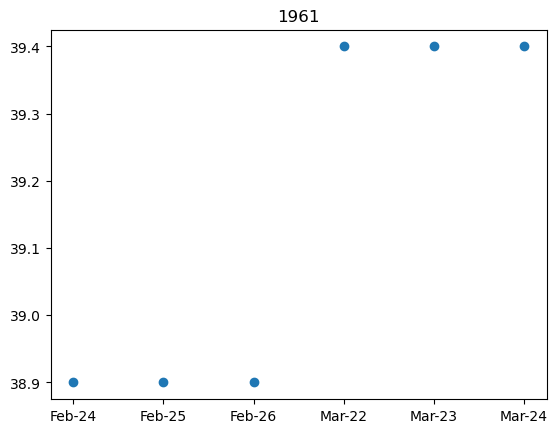

In [164]:
plt.scatter(date,Tmax)
plt.title('1961')

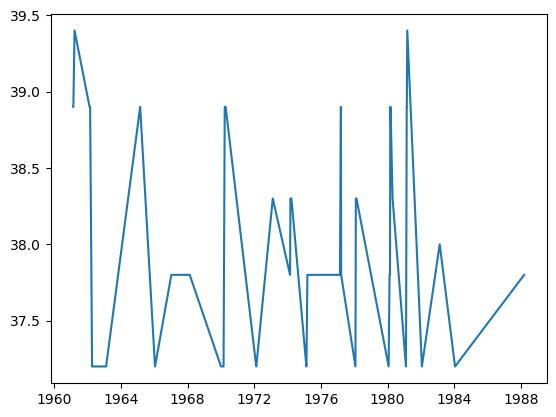

In [106]:
plt.plot(date_temp_more_than_percentile_85,temp_more_than_percentile_85.values)

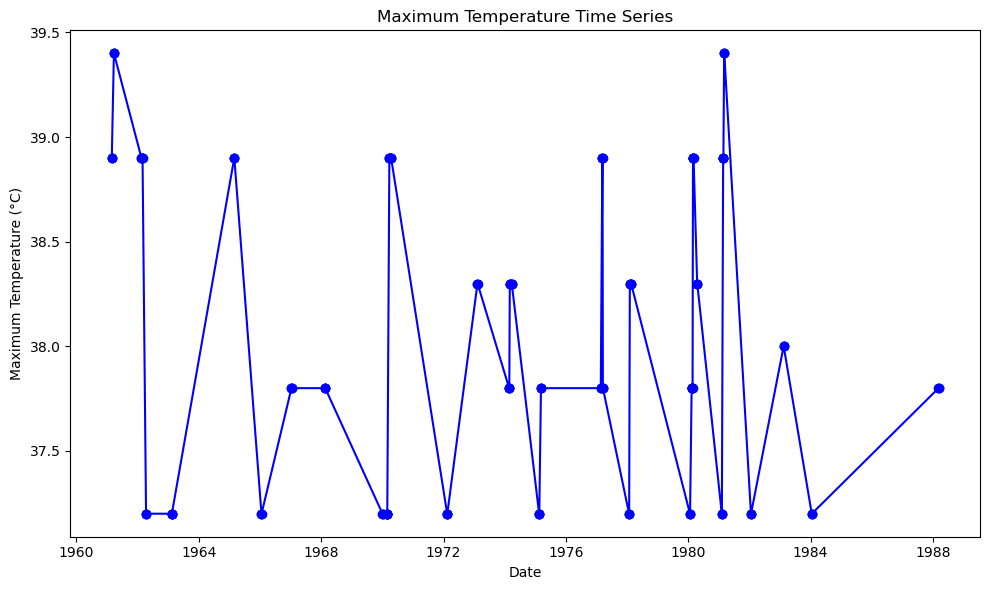

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with datetime index and 'Tmax' column
# Convert the index to datetime if it's not already in datetime format
temp_more_than_percentile_85.index = pd.to_datetime(temp_more_than_percentile_85.index)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(temp_more_than_percentile_85.index, temp_more_than_percentile_85, color='blue', marker='o', linestyle='-')
plt.title('Maximum Temperature Time Series')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature (°C)')
# plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
episodes_of_heat_waves=data.iloc[[14681,14682,14683,20507,20508,20509]]
episodes_of_heat_waves

,Tmax
date,
2000-03-12,39.5
2000-03-13,39.5
2000-03-14,39.5
2016-02-23,39.7
2016-02-24,39.7
2016-02-25,39.7


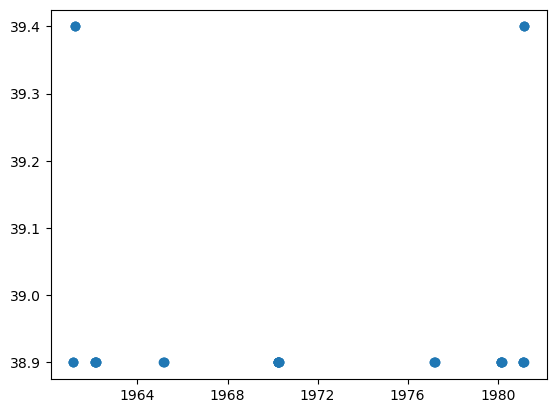

In [40]:
consecutive_days = temp_1961_1990.groupby(temp_1961_1990.ne(temp_1961_1990.shift()).cumsum()).transform('count')

temp_more_than_percentile_95= temp_1961_1990.where(temp_1961_1990 > percentile_95)
temp_more_than_percentile_95

temp_more_than_percentile_95 = temp_more_than_percentile_95.dropna()
temp_more_than_percentile_95.count()

temp_more_than_percentile_95 = temp_more_than_percentile_95[(temp_more_than_percentile_95 > percentile_95) & (consecutive_days >= 3)]

plt.scatter(temp_more_than_percentile_95.index,temp_more_than_percentile_95.values)


<BarContainer object of 6 artists>

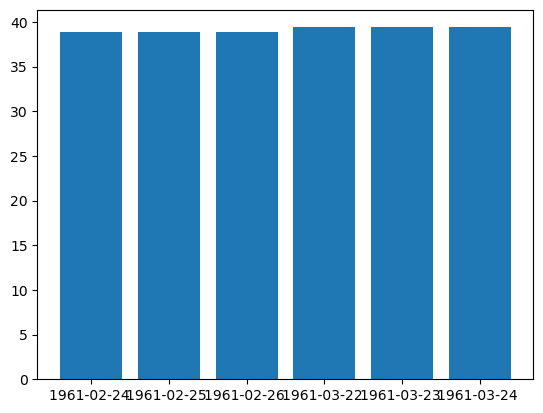

In [54]:
index=['1961-02-24 ', '1961-02-25 ', '1961-02-26 ', '1961-03-22 ','1961-03-23 ', '1961-03-24 ']
values=[38.9, 38.9, 38.9, 39.4, 39.4,39.4]

plt.bar(index,values)

In [47]:
temp_more_than_percentile_95.values

array([38.9, 38.9, 38.9, 39.4, 39.4, 39.4, 38.9, 38.9, 38.9, 38.9, 38.9,
       38.9, 38.9, 38.9, 38.9, 38.9, 38.9, 38.9, 38.9, 38.9, 38.9, 38.9,
       38.9, 38.9, 38.9, 38.9, 38.9, 38.9, 38.9, 38.9, 38.9, 38.9, 38.9,
       38.9, 38.9, 38.9, 38.9, 38.9, 38.9, 38.9, 38.9, 38.9, 39.4, 39.4,
       39.4])

In [21]:
consecutive_days = temp_1991_2020.groupby(temp_1991_2020.ne(temp_1991_2020.shift()).cumsum()).transform('count')

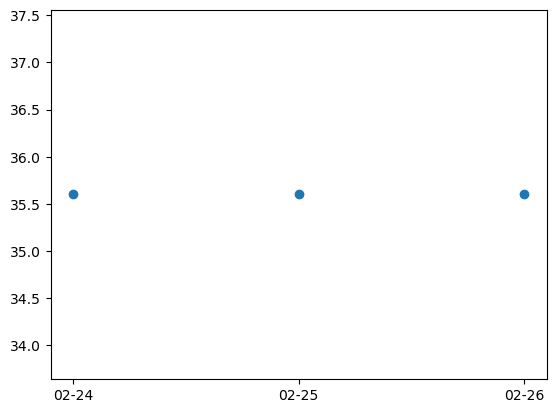

In [27]:
time=['02-24','02-25','02-26']
value=[35.6,35.6,35.6]

plt.scatter(time,value)

<BarContainer object of 6 artists>

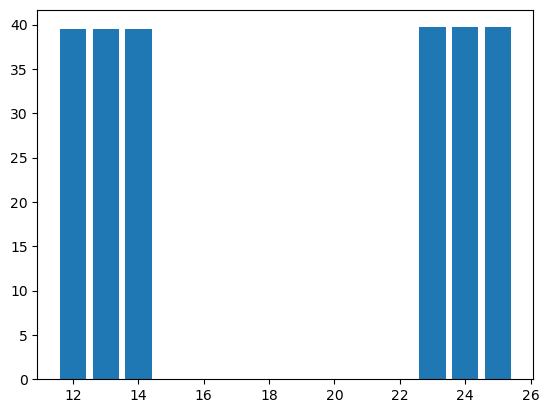

In [29]:
plt.bar(episodes_of_heat_waves.day,episodes_of_heat_waves.Tmax)